In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [71]:
df = pd.read_csv("/home/kiwilytics/Downloads/Orders_with_issues.csv") #export data


In [12]:
#scanning the problems in the data set

print(df.info())

print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          239 non-null    float64
 1   CustomerID       240 non-null    object 
 2   OrderDate        237 non-null    object 
 3   ShippedDate      219 non-null    object 
 4   ShippingCost     231 non-null    object 
 5   ShipCountry      245 non-null    object 
 6   ShipCity         241 non-null    object 
 7   ShippingCompany  245 non-null    object 
dtypes: float64(1), object(7)
memory usage: 15.4+ KB
None
    OrderID CustomerID   OrderDate ShippedDate       ShippingCost ShipCountry  \
0    1000.0       C001  2025-05-17  2025-07-30  -57.2545460244498     Germany   
1    1001.0       C002  2025-01-26  2025-07-30             320.61      Canada   
2    1002.0       C003  2025-03-08  2025-07-30             165.17      Canada   
3    1003.0       C004  2025-03-24  2025-07-30        

In [59]:
df['OrderDate']=pd.to_datetime(df['OrderDate'],errors='coerce') #change datatype into datetime
df['ShippedDate']=pd.to_datetime(df['ShippedDate'],errors='coerce') #change datatype into datetime
df['ShippingCost']=pd.to_numeric(df['ShippingCost'],errors='coerce') #change datatype into numeric
df.loc[df['ShippingCost']<0,'ShippingCost']=np.nan  #let any cost less than 0 =NaN


In [14]:
df['OrderID']=df['OrderID'].fillna(method='ffill') #fill the null value in orderid with the previous orderid
df['CustomerID']=df['CustomerID'].fillna("unknown") #filling the null value in customerid with "unknown" word
df['ShipCity']=df['ShipCity'].fillna(df['ShipCountry']) #filiing the null value in shipcity with the chipcountry value

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          245 non-null    float64       
 1   CustomerID       245 non-null    object        
 2   OrderDate        226 non-null    datetime64[ns]
 3   ShippedDate      211 non-null    datetime64[ns]
 4   ShippingCost     223 non-null    float64       
 5   ShipCountry      245 non-null    object        
 6   ShipCity         245 non-null    object        
 7   ShippingCompany  245 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 15.4+ KB
None


/tmp/ipykernel_4366/3614235176.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['OrderID']=df['OrderID'].fillna(method='ffill') #fill the null value in orderid with the previous orderid


In [15]:
#Analysis

print(df.groupby(df['ShipCountry'])['OrderID'].count()) #how many order by each country

print(df['ShippingCost'].sum()) #total of shipping cost

print(df.groupby(df['ShipCountry'])['ShippingCost'].sum()) #total of shipping cost by each country

print(df.groupby(df['ShippingCompany'])['OrderID'].count()) #how many order by each company

ShipCountry
Canada       45
Egypt        41
Germany      38
Palestine    16
UK           56
USA          49
Name: OrderID, dtype: int64
54497.68
ShipCountry
Canada       10623.43
Egypt         9231.34
Germany       5344.99
Palestine     2910.02
UK           15986.31
USA          10401.59
Name: ShippingCost, dtype: float64
ShippingCompany
Aramex International              51
DHL Express                       53
FedEx Logistics                   54
Kiwilytics Goods Shipping LLC.    41
UPS Worldwide                     46
Name: OrderID, dtype: int64


In [16]:
df.to_csv("cleaned_order.csv",index=False)

Text(0.5, 1.0, 'how many order by each country')

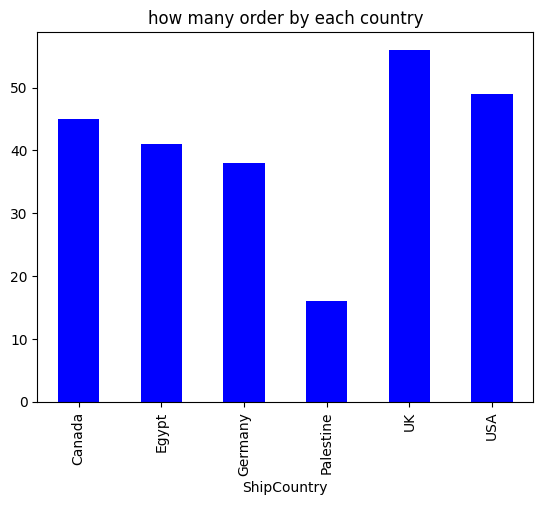

In [ ]:
#Visualization

df.groupby(df['ShipCountry'])['OrderID'].count().plot(kind="bar",color="blue")
plt.title("how many order by each country")

Text(0.5, 1.0, 'total of shipping cost by each country')

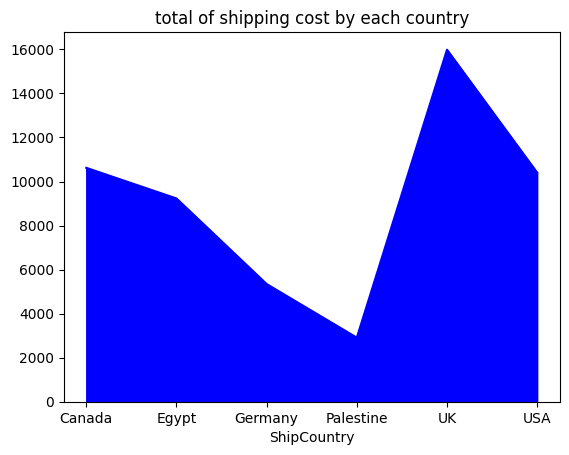

In [ ]:
#Visualization


df.groupby(df['ShipCountry'])['ShippingCost'].sum().plot(kind="area",color="blue")
plt.title("total of shipping cost by each country")

Text(0.5, 1.0, 'how many order by each company')

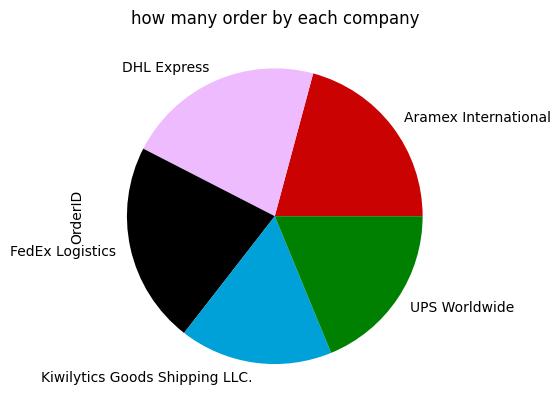

In [58]:
#Visualization


df.groupby(df['ShippingCompany'])['OrderID'].count().plot(kind="pie",colors=["#ca0201",	"#eebbff","black","#00A1D9","green"])
plt.title("how many order by each company")

Text(0.5, 1.0, 'orders count by year')

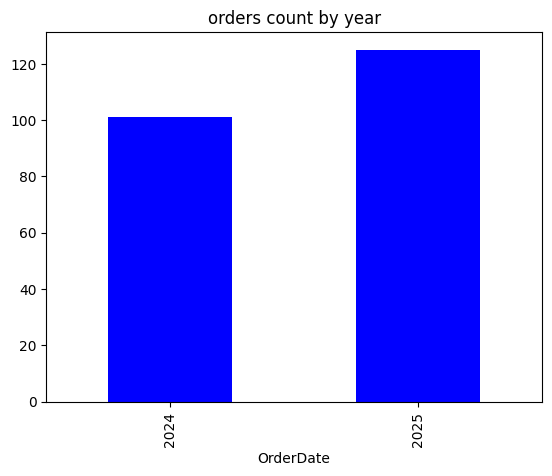

In [ ]:
#visualization and analysis

df.groupby(df["OrderDate"].dt.to_period("Y"))['OrderID'].count().plot(kind="bar",color="blue") #how many orders by year
plt.title("orders count by year")